# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy with full capital.
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    4. If you have free cash, use it all when fresh lows are set.
    
    (Scaling out)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Define the margin multiple

In [6]:
margin = 1

Run Strategy

In [7]:
s = strategy.Strategy(symbol, capital, start, end, use_adj=False, stop_loss_pct=85, margin=margin,
                      period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [8]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [9]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
518,2020-10-19,342.01,2020-11-05,350.24,8.23,691.32,84,47945.63,LONG,SPY
519,2020-12-11,366.30,2020-12-16,370.17,3.87,305.73,79,48251.36,LONG,SPY
520,2020-12-11,366.30,2020-12-17,372.24,5.94,469.26,79,48720.62,LONG,SPY
521,2021-01-15,375.70,2021-01-20,383.89,8.19,638.82,78,49359.44,LONG,SPY
522,2021-01-15,375.70,2021-01-21,384.24,8.54,666.12,78,50025.56,LONG,SPY
523,2021-01-27,374.41,2021-02-04,386.19,11.78,942.40,80,50967.96,LONG,SPY
524,2021-01-27,374.41,2021-02-05,387.71,13.30,1064.00,80,52031.95,LONG,SPY
525,2021-02-19,390.03,2021-03-10,389.58,-0.45,-35.55,79,51996.40,LONG,SPY
526,2021-02-19,390.03,2021-03-11,393.53,3.50,280.00,80,52276.40,LONG,SPY
527,2021-03-19,389.48,2021-03-26,395.98,6.50,1033.50,159,53309.90,LONG,SPY


In [10]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-22,63006.21,62354.31,62770.89,159,349.08,1.00,-
2021-03-23,62909.22,62146.02,62279.58,159,349.08,1.00,-
2021-03-24,62796.33,61956.81,61964.76,159,349.08,1.00,-
2021-03-25,62446.53,61389.18,62311.38,159,349.08,1.00,-
2021-03-26,63309.90,63309.90,63309.90,0,63309.90,1.00,X


Generate strategy stats - display all available stats

In [11]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2021-03-26
beginning_balance                                            10000
ending_balance                                            63309.90
total_net_profit                                          53309.90
gross_profit                                             103126.70
gross_loss                                               -49816.80
profit_factor                                                 2.07
return_on_initial_capital                                   533.10
annual_return_rate                                            6.97
trading_period                           27 years 4 months 15 days
pct_time_in_market                                           38.00
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

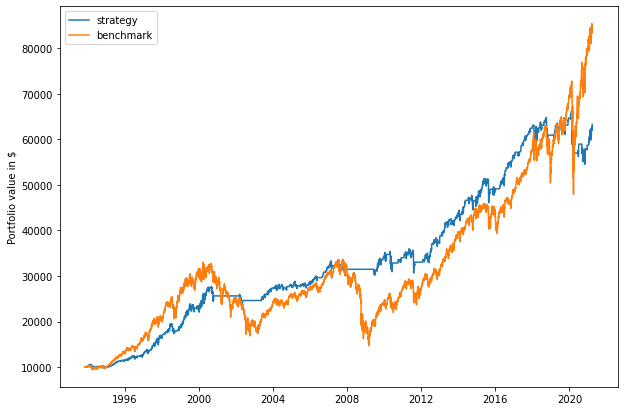

In [13]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

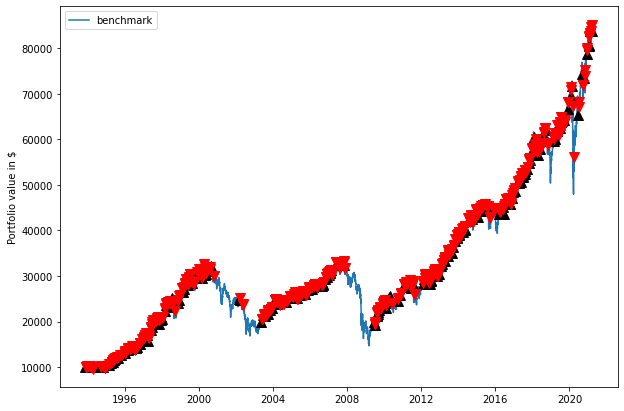

In [14]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.97,8.14
max_closed_out_drawdown,-19.61,-56.42
annualized_return_over_max_drawdown,0.36,0.14
best_month,13.66,23.06
worst_month,-18.74,-31.38
sharpe_ratio,0.70,0.51
sortino_ratio,0.56,0.64
monthly_std,2.26,4.52
annual_std,9.10,16.55


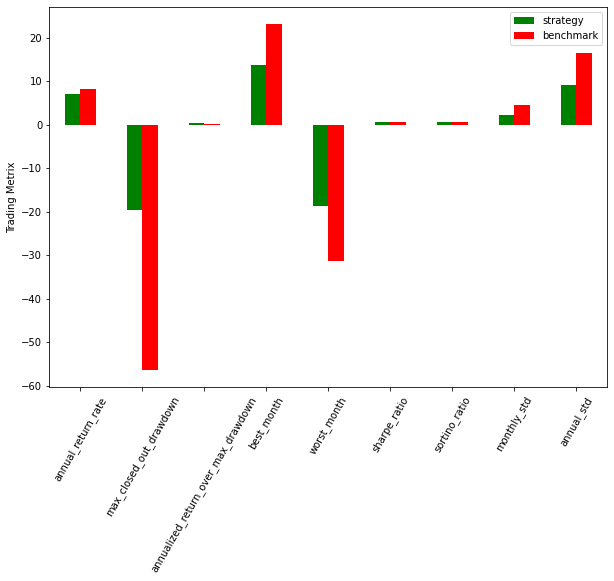

In [15]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df